<a href="https://colab.research.google.com/github/phycoding/my_first_blog/blob/main/Mc_donald_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
df = pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")

In [ ]:
df.head(10).style.background_gradient(cmap = 'gist_rainbow_r')

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,+2,56,Every three months,Female
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,23,Once a week,Female
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,58,Once a year,Male
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+1,32,Every three months,Female


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [ ]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [ ]:
#Data Preprocessing
from sklearn.preprocessing import LabelEncoder 
category = LabelEncoder()
categorical = ['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting','Gender','VisitFrequency']
df[categorical] = df[categorical].apply(category.fit_transform)
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,5,1
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,4,0
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,3,0
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,0,1


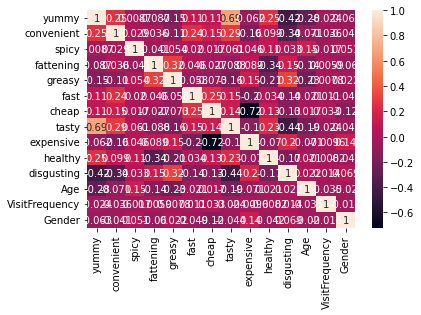

In [ ]:
plt.plot(fig_size = (12,16))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [ ]:
df.describe().style.background_gradient(cmap='mako_r')

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age,VisitFrequency,Gender
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,44.604955,2.637990,0.457674
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,14.221178,1.756057,0.498377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,45.000000,3.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,57.000000,4.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,71.000000,5.000000,1.000000


In [ ]:
dict={}
for i in df.columns:
    dict[i]=df[i].value_counts().shape[0]
    
pd.DataFrame(dict,index=['Unique']).T.style.background_gradient(cmap='mako_r')

,Unique
yummy,2
convenient,2
spicy,2
fattening,2
greasy,2
fast,2
cheap,2
tasty,2
expensive,2
healthy,2


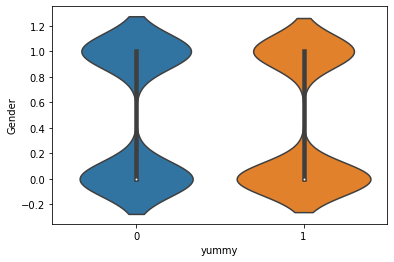

In [ ]:
sns.violinplot(x="yummy", y="Gender", data=df)
plt.show()

In [ ]:
#Plot Histrogram of Age Features......
import plotly.express as px
fig = px.histogram(df, x="Age",marginal="box",template ="simple_white",color_discrete_sequence = px.colors.diverging.Tropic)
fig.update_layout(title_text="<b> Distribution Of The Age Features </b>",
                  title_x=0.5, 
                  font_size=15)


In [ ]:
#Plot Donut chart of Outcome Features......
fig=px.pie(df,values=df['Gender'].value_counts(),names=df['Gender'].value_counts().index,template ="simple_white",color_discrete_sequence = px.colors.diverging.Tropic,hole=.6)
fig.update_layout(title_text="<b> Distribution Of The Gender Feature-Outcome </b>",
                  title_x=0.5,
                  font_size=15)

In [ ]:
column_drop = ['Like','VisitFrequency']
df_transform = df.drop(column_drop,axis=1)
df_transform

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age,Gender
0,0,1,0,1,0,1,1,0,1,0,0,61,0
1,1,1,0,1,1,1,1,1,1,0,0,51,0
2,0,1,1,1,1,1,0,1,1,1,0,62,0
3,1,1,0,1,1,1,1,1,0,0,1,69,0
4,0,1,0,1,1,1,1,0,0,1,0,49,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,47,1
1449,1,1,0,1,0,0,1,1,0,1,0,36,0
1450,1,1,0,1,0,1,0,1,1,0,0,52,0
1451,1,1,0,0,0,1,1,1,0,1,0,41,1


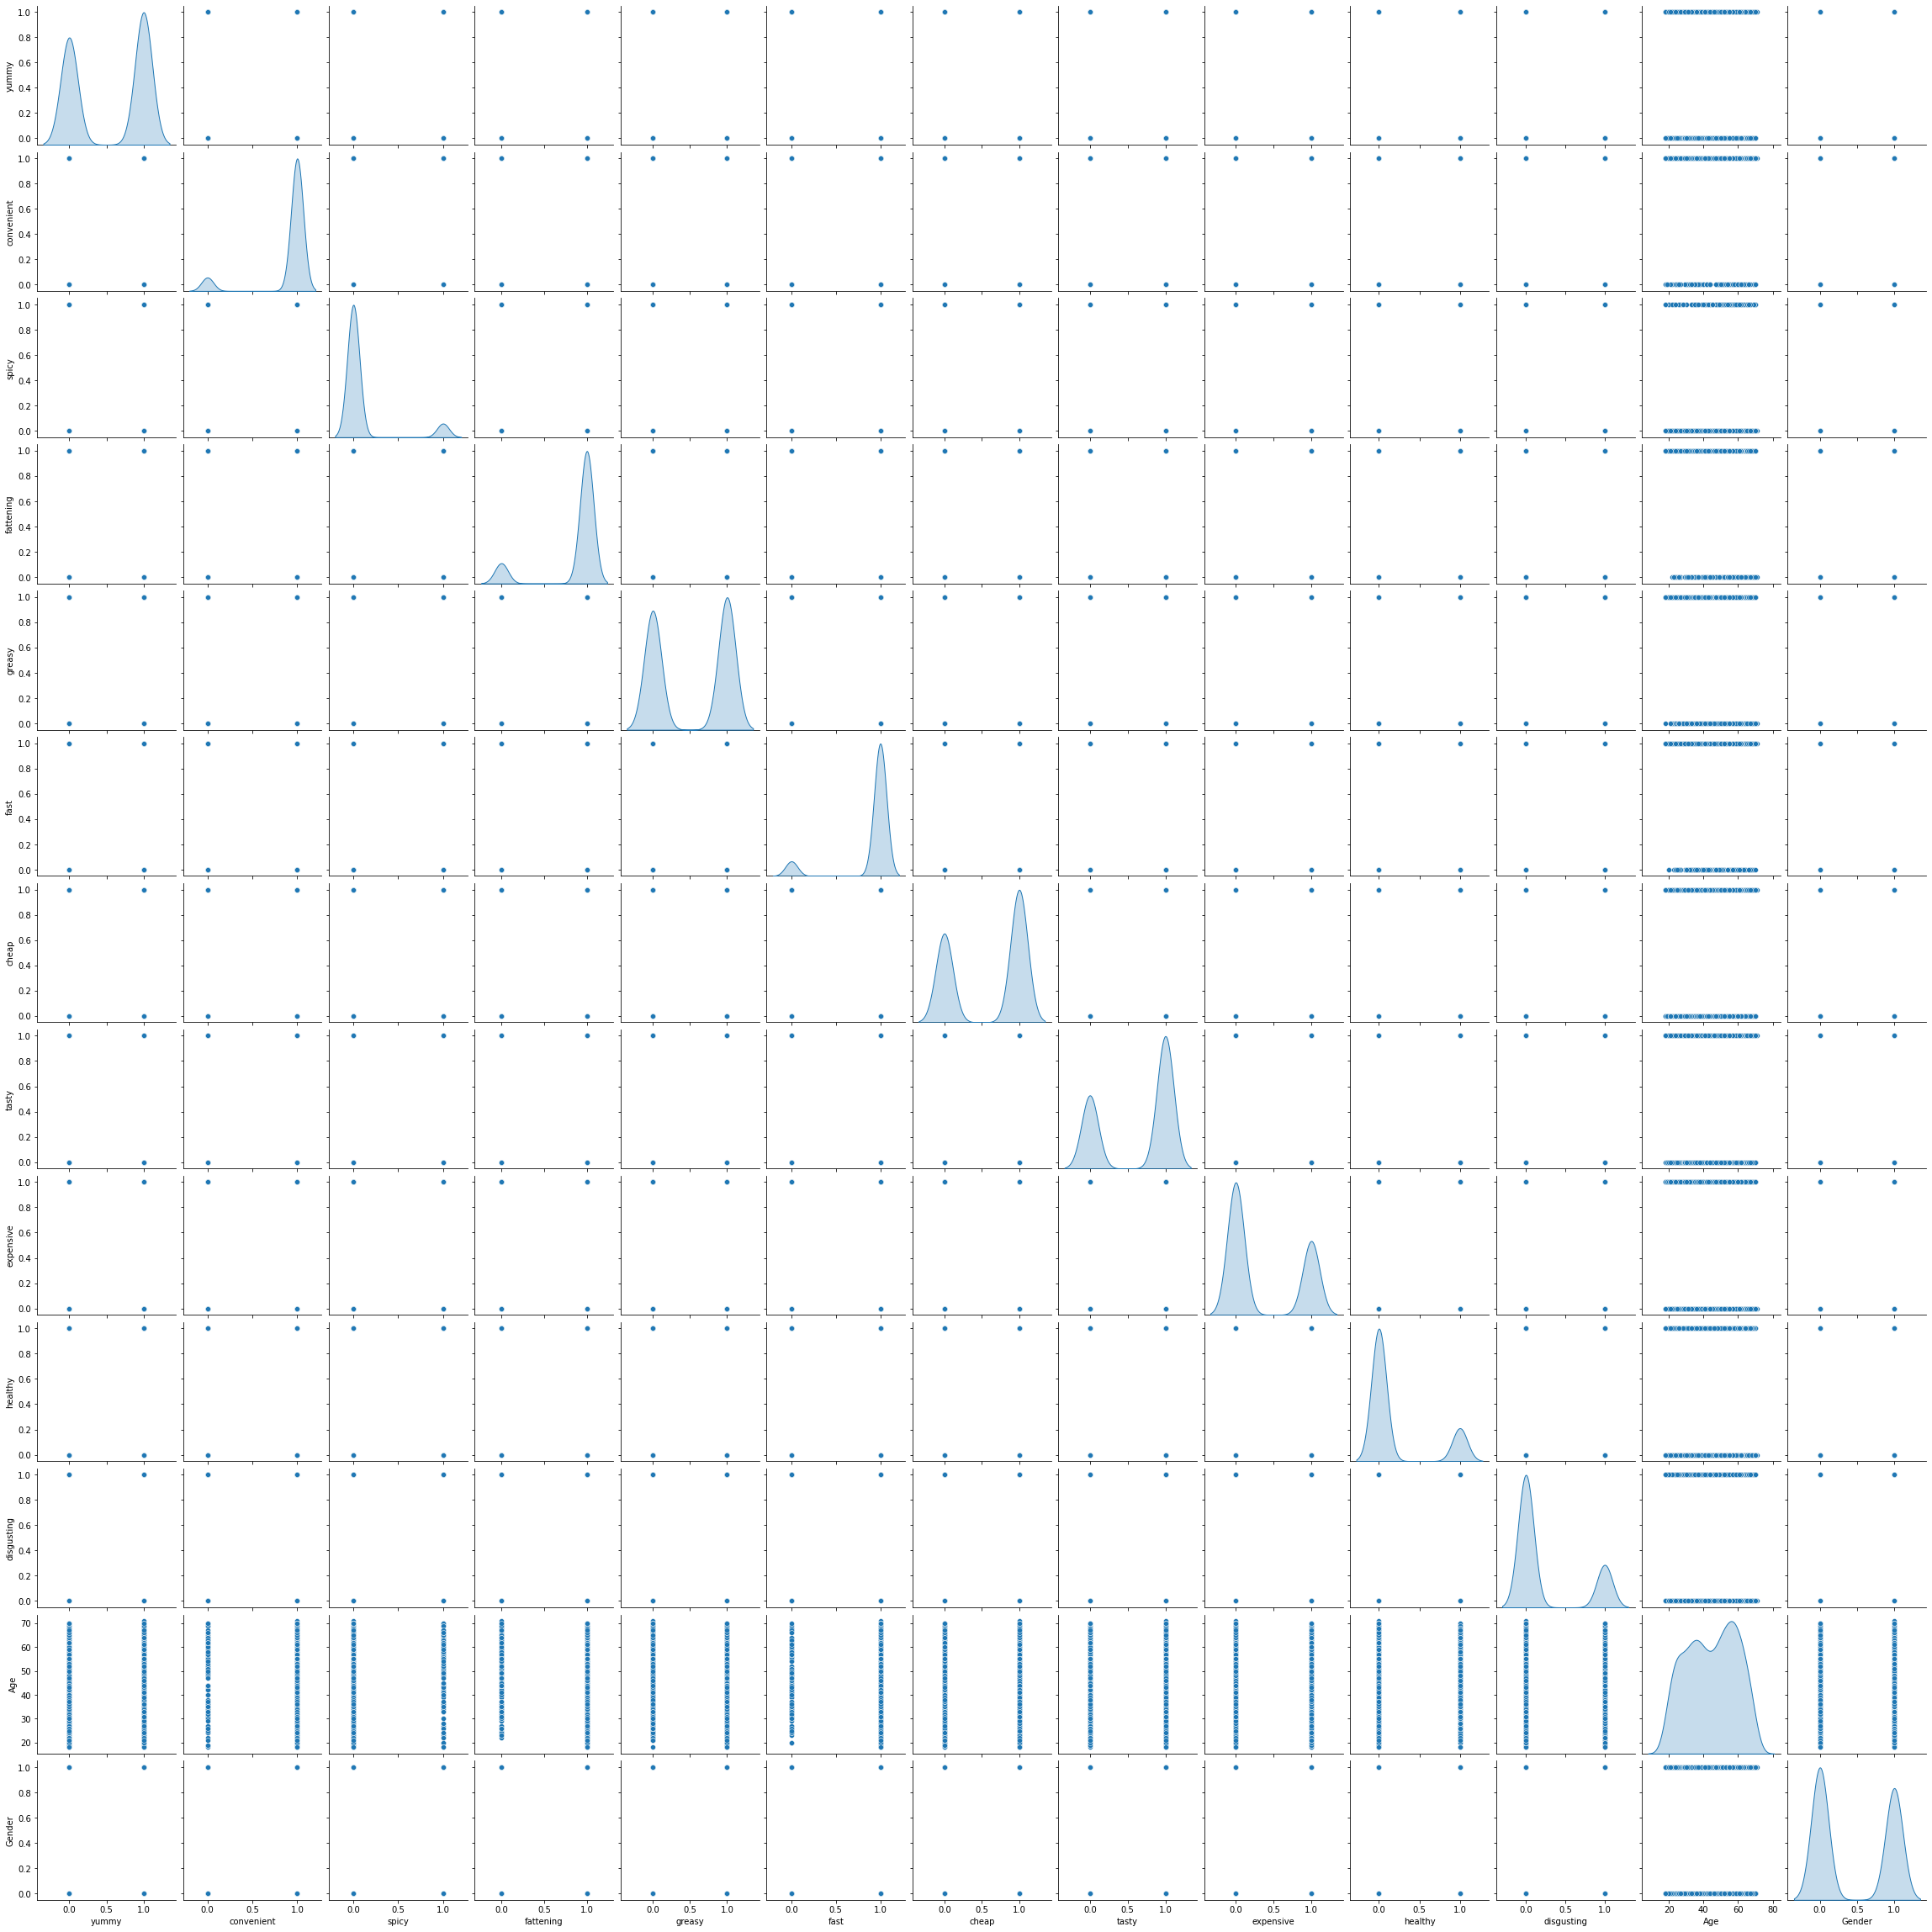

In [ ]:
# Produce a scatter matrix for each pair of features in the data
_ = sns.pairplot(df_transform, diag_kind = 'kde')

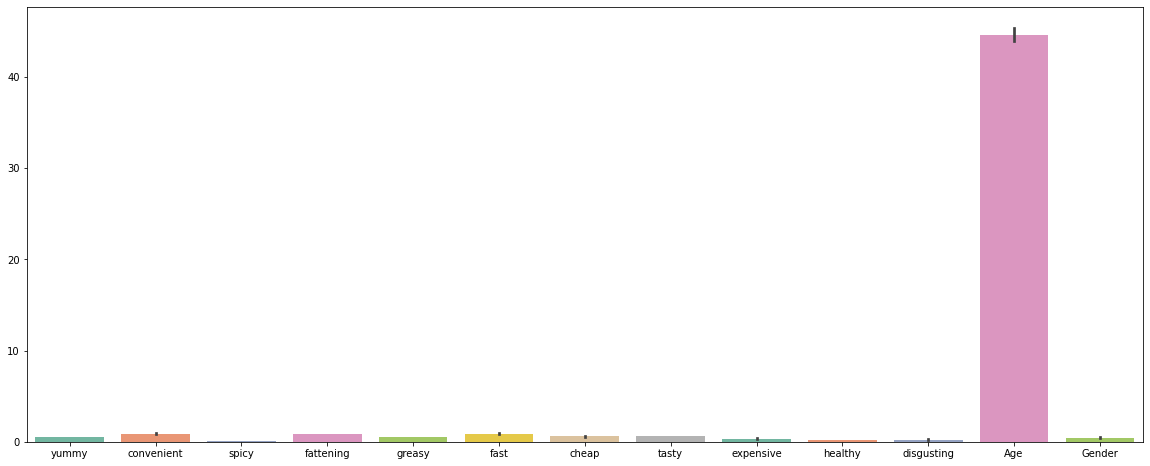

In [ ]:
plt.figure(figsize = (20,8))
_ = sns.barplot(data=df_transform, palette="Set2")

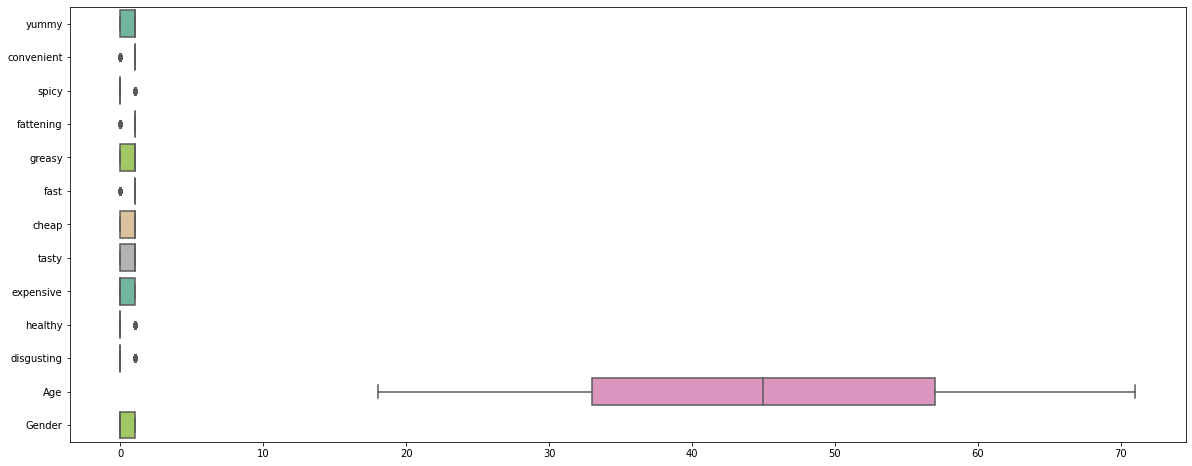

In [ ]:
plt.figure(figsize = (20,8))
_ = sns.boxplot(data=df_transform, orient='h', palette="Set2")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



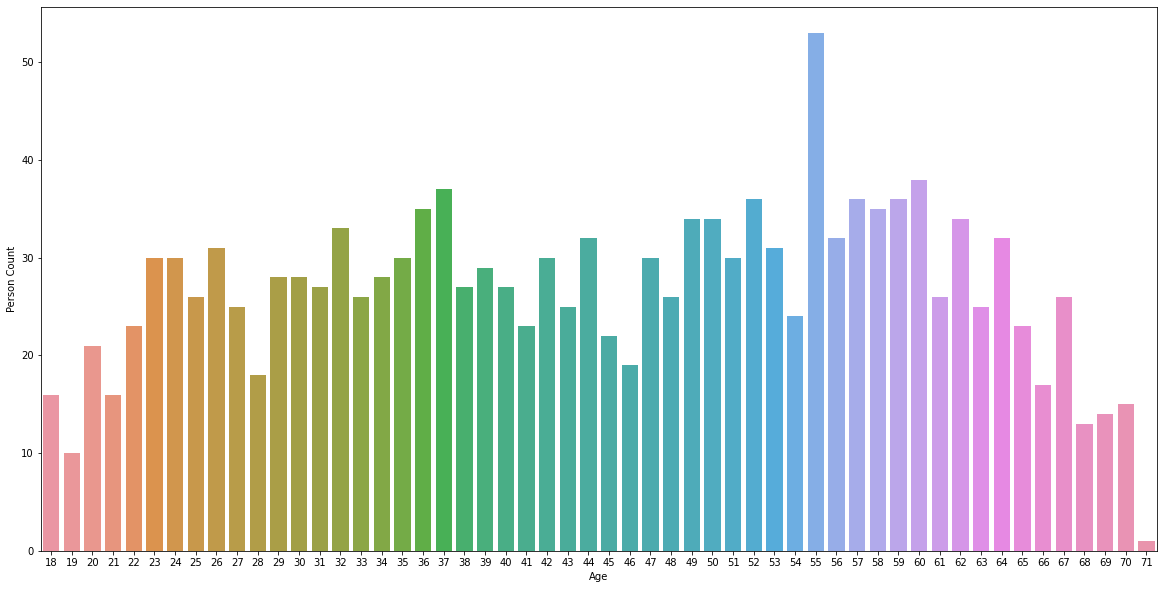

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(df_transform.Age)
plt.xlabel("Age")
plt.ylabel("Person Count")
plt.show()

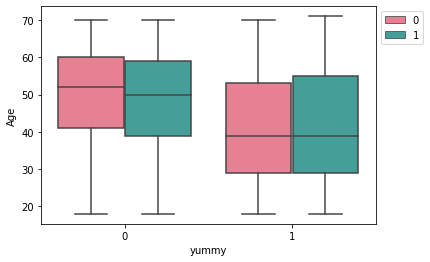

In [ ]:
sns.boxplot(data = df, x = 'yummy', y = 'Age', hue='Gender', palette='husl')
plt.legend(bbox_to_anchor = (1,1))

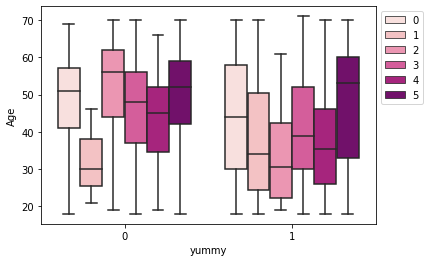

In [ ]:
sns.boxplot(data = df, x = 'yummy', y = 'Age', hue='VisitFrequency',  palette='RdPu')
plt.legend(bbox_to_anchor = (1,1))

#Using PCA analysis

In [ ]:
df = df.drop(['Like'],axis=1)

In [ ]:
# Doing the principal component analyis of the segmentation variables.
from sklearn.decomposition import PCA
pca = PCA(n_components = 11)
dx = pca.fit_transform(df)
col_names = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11']
dx = pd.DataFrame(dx,columns = col_names)
dx

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-16.416374,2.553255,0.292455,-0.202944,-0.263082,0.648487,-0.364808,0.186309,-0.404109,-0.187916,0.136484
1,-6.393024,2.615713,-0.247896,0.187344,-0.759589,-0.596244,-0.072184,0.011301,-0.066393,-0.141146,-0.081842
2,-17.404485,2.572808,0.294062,0.640579,-0.739605,-0.255843,0.722713,0.763470,-0.602546,0.549482,0.416236
3,-24.376182,-1.467284,-0.320917,-0.387857,-0.698358,-0.895220,0.217670,-0.729677,0.025082,-0.154868,-0.321554
4,-4.398818,-0.392632,0.203623,-0.654340,0.630853,-0.169638,0.516555,0.869534,-0.153737,-0.489439,0.121886
...,...,...,...,...,...,...,...,...,...,...,...
1448,-2.387800,-2.374293,1.596301,0.322648,0.252583,-0.140862,0.177646,-0.131655,0.305777,-0.183042,0.329971
1449,8.610997,-1.320127,-0.993586,-0.004945,-0.175326,0.498170,0.474773,-0.113912,0.349027,-0.392587,0.823536
1450,-7.387335,-0.377443,-0.234912,1.018301,-0.633319,0.239517,-0.431455,-0.207861,-0.181541,-0.072624,-0.073524
1451,3.591863,2.661690,-1.079402,0.164030,0.884530,0.281530,0.665286,0.075659,0.165137,0.003867,-0.314148


In [ ]:
data1 = df.copy()
data1 = data1.iloc[:,0:-4]
data2 = data1.copy()
data1 = df.replace(to_replace = ['Yes','No'],value = [1,0])
for col in (data2.columns):
    data2[col] = data2[col].map({'Yes':1, 'No':0})

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=2)
features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap','tasty', 'expensive', 'healthy', 'disgusting']
components = pca.fit_transform(data2)
loadings = pca.components_.T*np.sqrt(pca.explained_variance_)
fig = px.scatter(components, x=0, y=1)

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

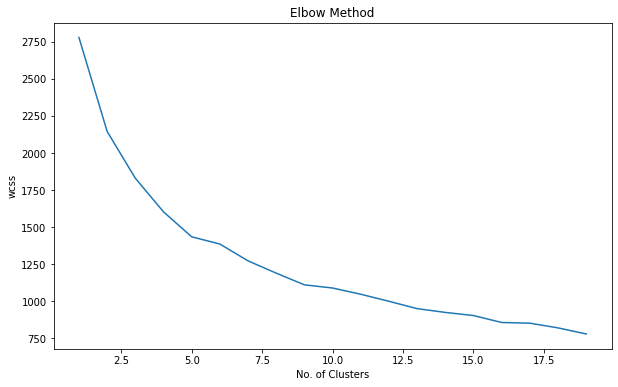

<Figure size 1080x360 with 0 Axes>

In [74]:
#KMeans Clustering
from sklearn.cluster import KMeans
wcss = [] #within cluster sum of square..distance between centroid and cluster(no.of clusters increase, wcss decreases)
for k in range(1,20):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0) 
    #no. of clusters, initalizer for smarter centroid initializing, random state from saving arrangement
    kmeans.fit(data3)
    wcss.append(kmeans.inertia_) #kmeans.inertia segregate datapoints into clusters

plt.plot(range(1,20),wcss)
plt.title("Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("wcss")
plt.figure(figsize=(15,5))
plt.show()

In [ ]:
from sklearn.cluster import KMeans
data3 = data2.values
l = []
for i in range(2,20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(data3)
    l.append(kmeans.inertia_)
wcss = pd.DataFrame({'Clusters':list(range(2,20)), 'WCSS':l})
px.bar(data_frame=wcss, x='Clusters', y='WCSS')
kmeans = KMeans(4)
kmeans.fit(data2)
data2['Predicted_Clusters'] = kmeans.predict(data2)

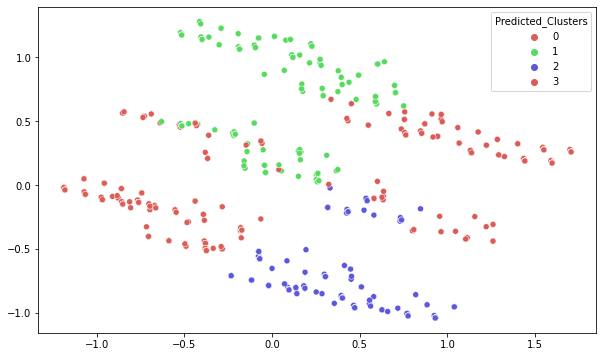

In [ ]:
plt.rcParams['figure.figsize'] = (10,6)
sns.scatterplot(x = components[:,0], y = components[:,1], hue=data2['Predicted_Clusters'], palette='hls')

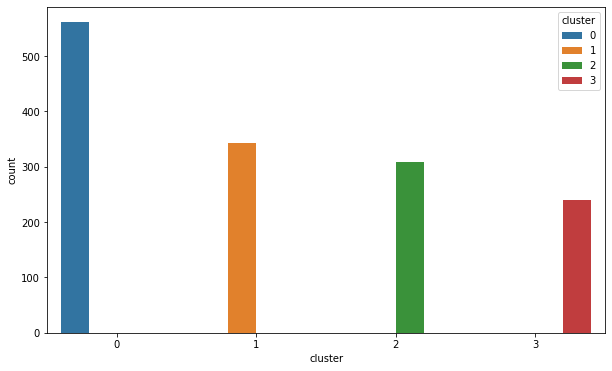

In [77]:
df['cluster'].value_counts()
sns.countplot(x = df['cluster'], hue = df['cluster'])
plt.show()

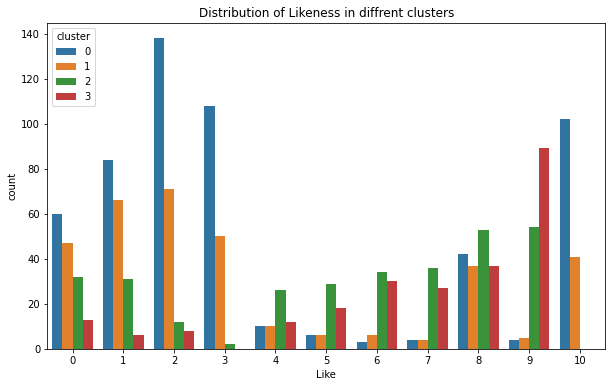

In [83]:

sns.countplot(x = df['Like'], hue = df['cluster'])


plt.title('Distribution of Likeness in diffrent clusters')
plt.show()

#Target Segment

In [70]:
df['cluster'] = data2['Predicted_Clusters']

In [72]:
from pandas.io.formats.info import DataFrameInfoPrinter
from sklearn.preprocessing import LabelEncoder

df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster')['Like'].mean()
Like = Like.to_frame().reset_index()
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster')['Gender'].mean()
Gender = Gender.to_frame().reset_index()


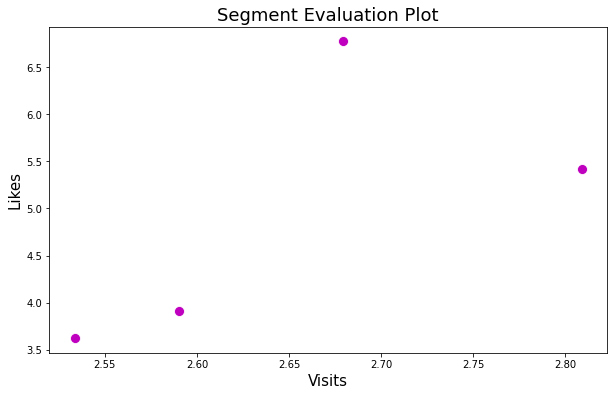

In [73]:
segments = Gender.merge(Like, on='cluster', how='left').merge(visit, on='cluster', how='left')
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segments,s=100, color="m")
plt.title("Segment Evaluation Plot", fontsize = 18) 
plt.xlabel("Visits", fontsize = 15) 
plt.ylabel("Likes", fontsize = 15) 
plt.show()
